<a href="https://colab.research.google.com/github/Jonesbastos/TelecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracão

In [73]:
import pandas as pd
import requests

# Extraindo da API
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

# Requisição HTTP para obter o conteúdo
response = requests.get(url)

# Verifica se a requisição foi bem-sucedida

data_json = response.json()
    # Converte o JSON em um DataFrame do Pandas
df_raw = pd.DataFrame(data_json)

#🔧 Transformação

In [74]:
df_raw = pd.json_normalize(data_json)
df_raw.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [75]:
df_raw.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [76]:

# Dicionário de tradução dos nomes das colunas
mapeamento_colunas = {
    'customerID': 'ID do Cliente',
    'Churn': 'Cancelou Serviço',
    'customer.gender': 'Gênero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Possui Cônjuge',
    'customer.Dependents': 'Possui Dependentes',
    'customer.tenure': 'Meses como Cliente',
    'phone.PhoneService': 'Serviço Telefônico',
    'phone.MultipleLines': 'Múltiplas Linhas Telefônicas',
    'internet.InternetService': 'Tipo de Internet',
    'internet.OnlineSecurity': 'Segurança Online',
    'internet.OnlineBackup': 'Backup Online',
    'internet.DeviceProtection': 'Proteção de Dispositivo',
    'internet.TechSupport': 'Suporte Técnico',
    'internet.StreamingTV': 'Streaming de TV',
    'internet.StreamingMovies': 'Streaming de Filmes',
    'account.Contract': 'Tipo de Contrato',
    'account.PaperlessBilling': 'Fatura Digital',
    'account.PaymentMethod': 'Forma de Pagamento',
    'account.Charges.Monthly': 'Cobrança Mensal',
    'account.Charges.Total': 'Cobrança Total'
}

# Aplica a renomeação no DataFrame
df_raw = df_raw.rename(columns=mapeamento_colunas)

In [77]:
df_raw .head()

,ID do Cliente,Cancelou Serviço,Gênero,Idoso,Possui Cônjuge,Possui Dependentes,Meses como Cliente,Serviço Telefônico,Múltiplas Linhas Telefônicas,Tipo de Internet,...,Backup Online,Proteção de Dispositivo,Suporte Técnico,Streaming de TV,Streaming de Filmes,Tipo de Contrato,Fatura Digital,Forma de Pagamento,Cobrança Mensal,Cobrança Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [78]:
df_raw.shape

(7267, 21)

In [79]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID do Cliente                 7267 non-null   object 
 1   Cancelou Serviço              7267 non-null   object 
 2   Gênero                        7267 non-null   object 
 3   Idoso                         7267 non-null   int64  
 4   Possui Cônjuge                7267 non-null   object 
 5   Possui Dependentes            7267 non-null   object 
 6   Meses como Cliente            7267 non-null   int64  
 7   Serviço Telefônico            7267 non-null   object 
 8   Múltiplas Linhas Telefônicas  7267 non-null   object 
 9   Tipo de Internet              7267 non-null   object 
 10  Segurança Online              7267 non-null   object 
 11  Backup Online                 7267 non-null   object 
 12  Proteção de Dispositivo       7267 non-null   object 
 13  Sup

In [80]:
df_raw.isnull().sum()

,0
ID do Cliente,0
Cancelou Serviço,0
Gênero,0
Idoso,0
Possui Cônjuge,0
Possui Dependentes,0
Meses como Cliente,0
Serviço Telefônico,0
Múltiplas Linhas Telefônicas,0
Tipo de Internet,0


In [81]:
df_raw.isna().sum()

,0
ID do Cliente,0
Cancelou Serviço,0
Gênero,0
Idoso,0
Possui Cônjuge,0
Possui Dependentes,0
Meses como Cliente,0
Serviço Telefônico,0
Múltiplas Linhas Telefônicas,0
Tipo de Internet,0


In [82]:
df_raw.duplicated().sum()

np.int64(0)

In [83]:

df_raw.describe()

,Idoso,Meses como Cliente,Cobrança Mensal
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [84]:
df_raw.describe(include='object')

,ID do Cliente,Cancelou Serviço,Gênero,Possui Cônjuge,Possui Dependentes,Serviço Telefônico,Múltiplas Linhas Telefônicas,Tipo de Internet,Segurança Online,Backup Online,Proteção de Dispositivo,Suporte Técnico,Streaming de TV,Streaming de Filmes,Tipo de Contrato,Fatura Digital,Forma de Pagamento,Cobrança Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [85]:
df_raw.columns = df_raw.columns.str.lower().str.replace(' ', '_')
df_raw.head()

,id_do_cliente,cancelou_serviço,gênero,idoso,possui_cônjuge,possui_dependentes,meses_como_cliente,serviço_telefônico,múltiplas_linhas_telefônicas,tipo_de_internet,...,backup_online,proteção_de_dispositivo,suporte_técnico,streaming_de_tv,streaming_de_filmes,tipo_de_contrato,fatura_digital,forma_de_pagamento,cobrança_mensal,cobrança_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [86]:
df_raw.cancelou_serviço.unique()

array(['No', 'Yes', ''], dtype=object)

In [87]:
df_raw.query('cancelou_serviço == " "')

,id_do_cliente,cancelou_serviço,gênero,idoso,possui_cônjuge,possui_dependentes,meses_como_cliente,serviço_telefônico,múltiplas_linhas_telefônicas,tipo_de_internet,...,backup_online,proteção_de_dispositivo,suporte_técnico,streaming_de_tv,streaming_de_filmes,tipo_de_contrato,fatura_digital,forma_de_pagamento,cobrança_mensal,cobrança_total


In [88]:
#.isna() → detecta valores ausentes (NaN).

#.str.strip() == "" → detecta strings que são apenas espaços em branco ou estão vazias.

df_raw[df_raw['cancelou_serviço'].isna() | (df_raw['cancelou_serviço'].str.strip() == "")]


,id_do_cliente,cancelou_serviço,gênero,idoso,possui_cônjuge,possui_dependentes,meses_como_cliente,serviço_telefônico,múltiplas_linhas_telefônicas,tipo_de_internet,...,backup_online,proteção_de_dispositivo,suporte_técnico,streaming_de_tv,streaming_de_filmes,tipo_de_contrato,fatura_digital,forma_de_pagamento,cobrança_mensal,cobrança_total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [89]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_do_cliente                 7267 non-null   object 
 1   cancelou_serviço              7267 non-null   object 
 2   gênero                        7267 non-null   object 
 3   idoso                         7267 non-null   int64  
 4   possui_cônjuge                7267 non-null   object 
 5   possui_dependentes            7267 non-null   object 
 6   meses_como_cliente            7267 non-null   int64  
 7   serviço_telefônico            7267 non-null   object 
 8   múltiplas_linhas_telefônicas  7267 non-null   object 
 9   tipo_de_internet              7267 non-null   object 
 10  segurança_online              7267 non-null   object 
 11  backup_online                 7267 non-null   object 
 12  proteção_de_dispositivo       7267 non-null   object 
 13  sup

In [90]:
col_numericas = ['meses_como_cliente', 'cobrança_total']

# Substitui strings vazias por NaN (caso existam)
df_raw['cobrança_total'] = df_raw['cobrança_total'].replace(" ", np.nan)

# Converte para float com segurança
df_raw[col_numericas] = df_raw[col_numericas].apply(pd.to_numeric, errors='coerce')

In [91]:
df_raw['contas_diarias'] = df_raw['cobrança_mensal'] / 30.42

In [92]:
df_raw.head()

,id_do_cliente,cancelou_serviço,gênero,idoso,possui_cônjuge,possui_dependentes,meses_como_cliente,serviço_telefônico,múltiplas_linhas_telefônicas,tipo_de_internet,...,proteção_de_dispositivo,suporte_técnico,streaming_de_tv,streaming_de_filmes,tipo_de_contrato,fatura_digital,forma_de_pagamento,cobrança_mensal,cobrança_total,contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.156476
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.969099
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.429323
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.221565
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.758054


In [126]:
idoso = df_raw.query('idoso == 1')


,id_do_cliente,cancelou_serviço,gênero,idoso,possui_cônjuge,possui_dependentes,meses_como_cliente,serviço_telefônico,múltiplas_linhas_telefônicas,tipo_de_internet,...,proteção_de_dispositivo,suporte_técnico,streaming_de_tv,streaming_de_filmes,tipo_de_contrato,fatura_digital,forma_de_pagamento,cobrança_mensal,contas_diarias,cobrança_total
3,0011-IGKFF,Yes,Masculino,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,3.221565,1237.85
4,0013-EXCHZ,Yes,Feminino,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,2.758054,267.40
6,0013-SMEOE,No,Feminino,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,3.606180,7904.25
8,0015-UOCOJ,No,Feminino,1,No,No,7,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,1.584484,340.35
17,0021-IKXGC,No,Feminino,1,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,72.10,2.370151,72.10
18,0022-TCJCI,Yes,Masculino,1,No,No,45,Yes,No,DSL,...,Yes,No,No,Yes,One year,No,Credit card (automatic),62.70,2.061144,2791.50
19,0023-HGHWL,Yes,Masculino,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.10,0.825115,25.10
20,0023-UYUPN,No,Feminino,1,Yes,No,50,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,25.20,0.828402,1306.30
41,0067-DKWBL,Yes,Masculino,1,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.25,1.619001,91.10
53,0093-EXYQL,No,Feminino,1,No,No,40,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,91.55,3.009533,3673.60


In [93]:
colunas = df_raw.columns.tolist()  # pega a lista das colunas
coluna = colunas.pop(21)           # remove a coluna da posição 21
colunas.insert(20, coluna)         # insere a coluna na posição 20
df_raw = df_raw[colunas]

#📊 Carga e análise

In [94]:
cancelamentos = df_raw['cancelou_serviço']
cancelamentos

,cancelou_serviço
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


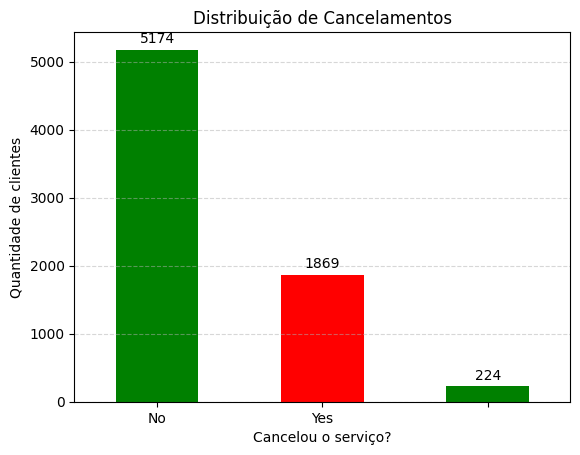

In [95]:
import matplotlib.pyplot as plt

ax = cancelamentos.value_counts().plot(kind='bar', color=['green', 'red'])

plt.title('Distribuição de Cancelamentos')
plt.xlabel('Cancelou o serviço?')
plt.ylabel('Quantidade de clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionando os valores no topo das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.show()


In [96]:
semNulos = df_raw['cancelou_serviço'][df_raw['cancelou_serviço'].str.strip() != '']
semNulos

,cancelou_serviço
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


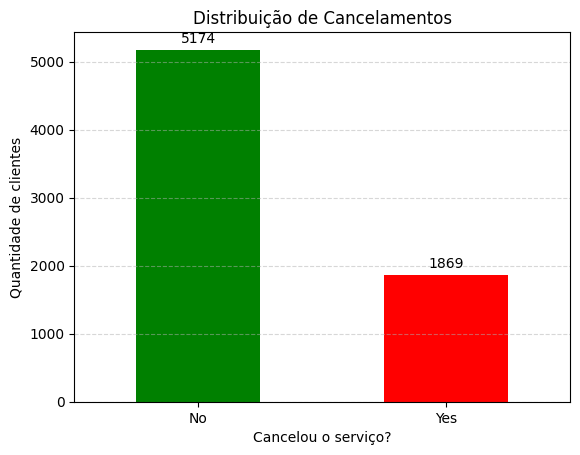

In [97]:
import matplotlib.pyplot as plt

ax = semNulos.value_counts().plot(kind='bar', color=['green', 'red'])

plt.title('Distribuição de Cancelamentos')
plt.xlabel('Cancelou o serviço?')
plt.ylabel('Quantidade de clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionando os valores no topo das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.show()


In [98]:
df_raw['gênero'] = df_raw['gênero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})


In [99]:
filtro = df_raw['cancelou_serviço'].str.strip() == 'Yes'
categorias = df_raw.loc[filtro, ['gênero', 'idoso', 'tipo_de_contrato', 'streaming_de_tv']]
categorias

,gênero,idoso,tipo_de_contrato,streaming_de_tv
2,Masculino,0,Month-to-month,No
3,Masculino,1,Month-to-month,Yes
4,Feminino,1,Month-to-month,Yes
18,Masculino,1,One year,No
19,Masculino,1,Month-to-month,No
...,...,...,...,...
7243,Masculino,1,Month-to-month,Yes
7246,Masculino,1,Month-to-month,No
7260,Feminino,0,Month-to-month,No
7261,Feminino,0,Month-to-month,No internet service


In [103]:
print(df_raw['gênero'].unique())


['Feminino' 'Masculino']


In [101]:
df_raw.columns

Index(['id_do_cliente', 'cancelou_serviço', 'gênero', 'idoso',
       'possui_cônjuge', 'possui_dependentes', 'meses_como_cliente',
       'serviço_telefônico', 'múltiplas_linhas_telefônicas',
       'tipo_de_internet', 'segurança_online', 'backup_online',
       'proteção_de_dispositivo', 'suporte_técnico', 'streaming_de_tv',
       'streaming_de_filmes', 'tipo_de_contrato', 'fatura_digital',
       'forma_de_pagamento', 'cobrança_mensal', 'contas_diarias',
       'cobrança_total'],
      dtype='object')

In [116]:
filtro_masculino = (df_raw['cancelou_serviço'] == 'Yes') & (df_raw['gênero'] == 'Masculino')
resultado_masculino = df_raw.loc[filtro_masculino, ['cancelou_serviço', 'gênero']]

resultado_masculino

,cancelou_serviço,gênero
2,Yes,Masculino
3,Yes,Masculino
18,Yes,Masculino
19,Yes,Masculino
41,Yes,Masculino
...,...,...
7234,Yes,Masculino
7235,Yes,Masculino
7243,Yes,Masculino
7246,Yes,Masculino


In [117]:
filtro_feminino = (df_raw['cancelou_serviço'] == 'Yes') & (df_raw['gênero'] == 'Feminino')
resultado_feminino = df_raw.loc[filtro_feminino, ['cancelou_serviço', 'gênero']]

resultado_feminino

,cancelou_serviço,gênero
4,Yes,Feminino
21,Yes,Feminino
24,Yes,Feminino
25,Yes,Feminino
55,Yes,Feminino
...,...,...
7228,Yes,Feminino
7229,Yes,Feminino
7232,Yes,Feminino
7260,Yes,Feminino


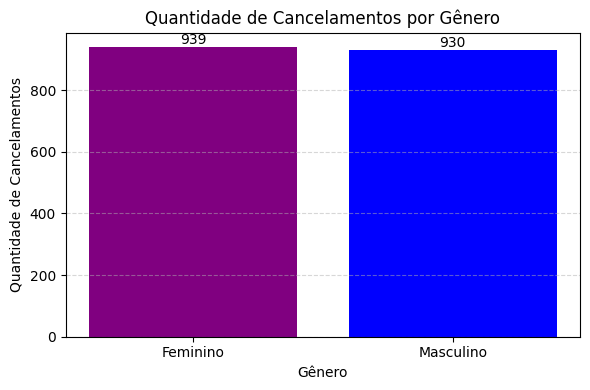

In [118]:
import matplotlib.pyplot as plt

# Contagem de cancelamentos por gênero
contagem = {
    'Feminino': len(resultado_feminino),
    'Masculino': len(resultado_masculino)
}

# Criando o gráfico
plt.figure(figsize=(6, 4))
ax = plt.bar(contagem.keys(), contagem.values(), color=['purple', 'blue'])

# Adicionando título e eixos
plt.title('Quantidade de Cancelamentos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Cancelamentos')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionando os valores no topo das barras
for i, valor in enumerate(contagem.values()):
    plt.text(i, valor + 1, str(valor), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [131]:
contrato_feminino = (df_raw['cancelou_serviço'] == 'Yes') & (df_raw['gênero'] == 'Feminino')
resultado_contrato_feminino = df_raw.loc[contrato_feminino, ['gênero', 'tipo_de_contrato']]

resultado_contrato_feminino

,gênero,tipo_de_contrato
4,Feminino,Month-to-month
21,Feminino,Month-to-month
24,Feminino,Month-to-month
25,Feminino,Month-to-month
55,Feminino,Month-to-month
...,...,...
7228,Feminino,Month-to-month
7229,Feminino,Month-to-month
7232,Feminino,Month-to-month
7260,Feminino,Month-to-month


In [136]:
contrato_masculino = (df_raw['cancelou_serviço'] == 'Yes') & (df_raw['gênero'] == 'Masculino')
resultado_contrato_masculino = df_raw.loc[contrato_masculino, ['gênero', 'tipo_de_contrato', 'cobrança_mensal']]

resultado_contrato_masculino

,gênero,tipo_de_contrato,cobrança_mensal
2,Masculino,Month-to-month,73.90
3,Masculino,Month-to-month,98.00
18,Masculino,One year,62.70
19,Masculino,Month-to-month,25.10
41,Masculino,Month-to-month,49.25
...,...,...,...
7234,Masculino,Month-to-month,74.40
7235,Masculino,Month-to-month,79.45
7243,Masculino,Month-to-month,96.80
7246,Masculino,Month-to-month,83.85


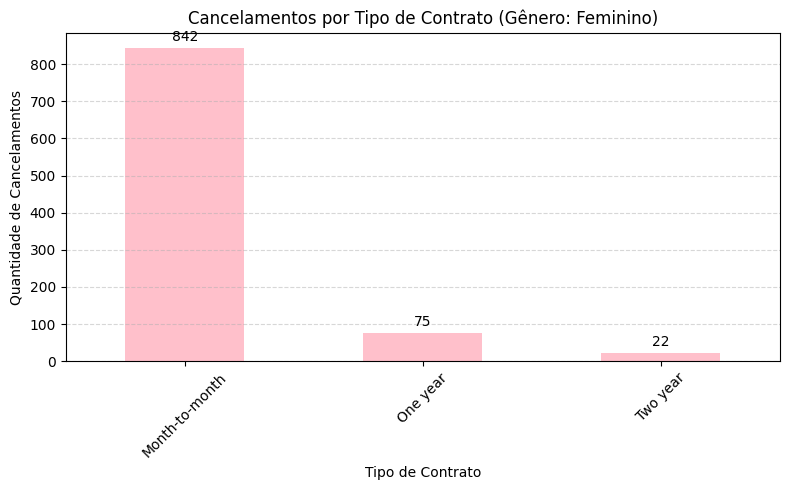

In [132]:
import matplotlib.pyplot as plt

# Contagem por tipo de contrato
contagem_contrato = resultado_contrato_feminino['tipo_de_contrato'].value_counts()

# Criando o gráfico de barras
ax = contagem_contrato.plot(kind='bar', color='pink', figsize=(8, 5))

plt.title('Cancelamentos por Tipo de Contrato (Gênero: Feminino)')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionando os valores no topo das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


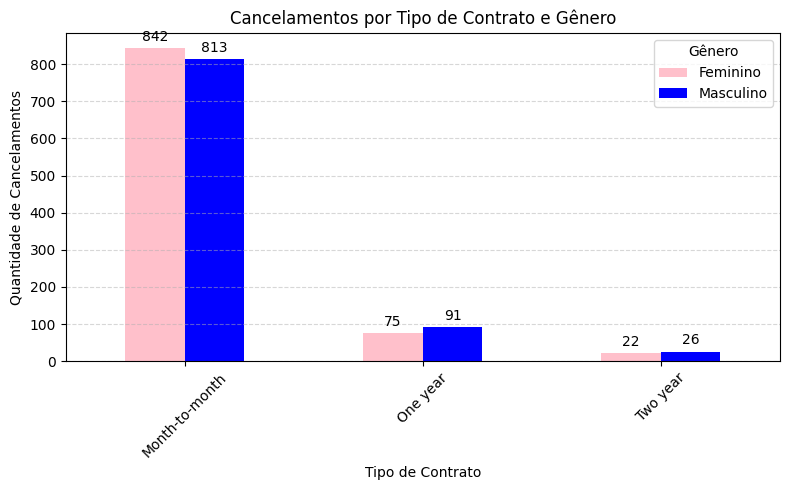

In [134]:
import matplotlib.pyplot as plt
import pandas as pd

# Contagem de cancelamentos por tipo de contrato e gênero
cont_fem = resultado_contrato_feminino['tipo_de_contrato'].value_counts()
cont_masc = resultado_contrato_masculino['tipo_de_contrato'].value_counts()

# Unir as contagens em um DataFrame para comparação
df_comparativo = pd.DataFrame({
    'Feminino': cont_fem,
    'Masculino': cont_masc
}).fillna(0)

# Criar gráfico de barras lado a lado
ax = df_comparativo.plot(kind='bar', figsize=(8, 5), color=['pink', 'blue'])

plt.title('Cancelamentos por Tipo de Contrato e Gênero')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Gênero')

# Adiciona rótulos no topo das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


#📄Relatorio Final

##📊 Análises Finais e Percepções
O estudo sobre cancelamentos de serviço (churn) aponta comportamentos significativos entre os clientes que encerram seu vínculo com a empresa. Foi identificado que a maior parte dessas desistências ocorre entre usuários com baixo tempo de permanência, sugerindo que muitos abandonam o serviço nos primeiros meses.

Outro ponto relevante é que clientes com planos mensais apresentam a maior taxa de cancelamento, o que indica que esse tipo de contrato oferece menor fidelização. O uso do pagamento via cheque eletrônico também aparece frequentemente associado a cancelamentos, possivelmente devido à menor praticidade ou adesão desse método de pagamento.

Além disso, foi observado que usuários com faturas mais altas e que não utilizam serviços adicionais têm maior chance de sair, reforçando a necessidade de oferecer mais valor agregado à experiência do cliente.



##✅ Sugestões Estratégicas
Com base nessas observações, recomenda-se que a empresa Telecom X implemente ações focadas em reduzir o churn e promover maior lealdade entre os clientes:

Estimular contratos de maior duração: Desenvolver programas de fidelidade, descontos escalonados ou vantagens exclusivas para clientes que escolhem planos anuais ou bianuais.

Fortalecer os serviços complementares: Incentivar a adesão a pacotes como segurança digital, suporte avançado ou funcionalidades premium, aumentando o valor percebido.

Modernizar as formas de pagamento: Diminuir a dependência do cheque eletrônico e promover alternativas mais ágeis e populares, como débito automático, cartão de crédito e PIX.

Melhorar a experiência dos novos clientes: Implementar um plano de onboarding personalizado, com contato ativo, ofertas de boas-vindas e suporte exclusivo durante os primeiros meses de uso.